In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
from sklearn.linear_model import LogisticRegression
from sklearn import decomposition
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
loadFile = loadmat('emnist-byclass.mat')
data = loadFile['dataset']
train_arrs = data[0][0][0][0][0][0]
train_labels = data[0][0][0][0][0][1]

Note that above, technically am JUST taking the training data (EMNIST comes pre-split), but that's more than enough as proof of concept, to be honest.

As a bit of a baseline, let's take a look at LogisticRegression acting on the full feature set.
(not actually running the code here since it takes a while, just going to copy paste output from a different notebook)

In [ ]:
lr = LogisticRegression()
lr.fit(train_arrs,train_labels)
lr.score(data[0][0][1][0][0][0],data[0][0][1][0][0][1])
#the above portions of the data array are the test sets

lr.score on testing data spits out:

0.7213018921451476

So actually- not that bad! Let's see how close we can get playing around with PCA

# Let's start with the most bare-bones PCA features, so like n=1

In [ ]:
scores = []
for i in range(1,2):
    pca = decomposition.PCA(n_components=i)
    X_train,X_test,y_train,y_test = train_test_split(train_arrs,train_labels, test_size=0.3)
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    lr = LogisticRegression(max_iter = 10000)
    lr.fit(X_train,y_train)
    scores1.append(lr.score(X_test,y_test))

scores

Output:
[0.14522474968908144]


More generally for n=1,2,3,4 for LR, KNN and Decision Trees 

In [3]:
LRs = [0.14893495080714492,0.22582386092272425,0.25642372719457446,0.3212150157608177]
KNNs = [0.11940013372814978,0.1824529563473111,0.23330786130480466,0.33317413315502914]
DTs = [0.08586302416658706,0.13651733689941734,0.17330213009838571,0.25805712102397554]
#accuracy scores 

In [1]:
import matplotlib.pyplot as plt

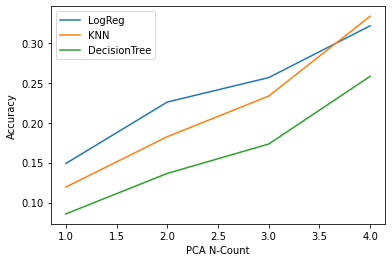

In [8]:
plt.plot([1,2,3,4],LRs, label = 'LogReg')
plt.plot([1,2,3,4],KNNs, label = 'KNN')
plt.plot([1,2,3,4],DTs, label = 'DecisionTree')
plt.xlabel('PCA N-Count')
plt.ylabel('Accuracy')
plt.legend();

And then lastly, looking at PCA with n_components = 39,40, you can see that we're getting pretty close to baseline (atleast for LR)

In [ ]:
scores2 = []
for i in range(39,41):
    pca = decomposition.PCA(n_components=i)
    X_train,X_test,y_train,y_test = train_test_split(train_arrs,train_labels, test_size=0.3)
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    lr = LogisticRegression(max_iter = 10000)
    lr.fit(X_train,y_train)
    #knn = KNeighborsClassifier(n_neighbors = 5)
    #knn.fit(trainPCA,train_labels)
    scores2.append(lr.score(X_test,y_test))
    #scores.append(knn.score(trainPCA,train_labels))
    
scores2

Output: [0.6936956729391537, 0.69344254465565]